In [1]:
import pandas as pd
df_2014 = pd.read_csv("2014_Financial_Data.csv")
df_2015 = pd.read_csv("2015_Financial_Data.csv")
df_2016 = pd.read_csv("2016_Financial_Data.csv")



In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
# Let's Check Shape of Each data set
print("Shape of data for Year 2014 is {}".format(df_2014.shape))
print("Shape of data for Year 2015 is {}".format(df_2015.shape))
print("Shape of data for Year 2016 is {}".format(df_2016.shape))

Shape of data for Year 2014 is (3808, 225)
Shape of data for Year 2015 is (4120, 225)
Shape of data for Year 2016 is (4797, 225)


In [8]:
# Let's Check Data Types

df_2014.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 6.5+ MB


In [13]:
# Data missing information for 2014 year
data_info=pd.DataFrame(df_2014.dtypes).T.rename(index={0:'column type'})
data_info=data_info._append(pd.DataFrame(df_2014.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info._append(pd.DataFrame(df_2014.isnull().sum()/df_2014.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,object,float64,int64
null values (nb),0,44,236,74,52,136,59,63,55,63,...,290,290,290,369,302,247,243,0,0,0
null values (%),0.0,1.155462,6.197479,1.943277,1.365546,3.571429,1.54937,1.654412,1.444328,1.654412,...,7.615546,7.615546,7.615546,9.690126,7.930672,6.486345,6.381303,0.0,0.0,0.0


In [14]:
# Data missing information for 2015 year
data_info=pd.DataFrame(df_2015.dtypes).T.rename(index={0:'column type'})
data_info=data_info._append(pd.DataFrame(df_2015.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info._append(pd.DataFrame(df_2015.isnull().sum()/df_2015.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2016 PRICE VAR [%],Class
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,object,float64,int64
null values (nb),0,67,340,193,65,265,170,174,42,175,...,368,369,369,458,399,351,347,0,0,0
null values (%),0.0,1.626214,8.252427,4.684466,1.57767,6.432039,4.126214,4.223301,1.019417,4.247573,...,8.932039,8.956311,8.956311,11.116505,9.684466,8.519417,8.42233,0.0,0.0,0.0


In [17]:
#Imputing the null with 0 because In our case missing values refects companies don't have value for that year


df_2014.fillna(0,inplace=True)
df_2015.fillna(0,inplace=True)
df_2016.fillna(0,inplace=True)


In [18]:
#Ratio Analysis
# Considering Procter & Gamble company only
df_2014 = df_2014[df_2014['Unnamed: 0'] =='PG' ]
df_2015 = df_2015[df_2015['Unnamed: 0'] =='PG' ]
df_2016 = df_2016[df_2016['Unnamed: 0'] =='PG' ]

In [23]:
df = df_2014._append([df_2015,df_2016])
df.fillna(0,inplace=True)
df.index = [2014,2015,2016]

Mean of Quick Ratio for P&G last 3 years is 0.54 


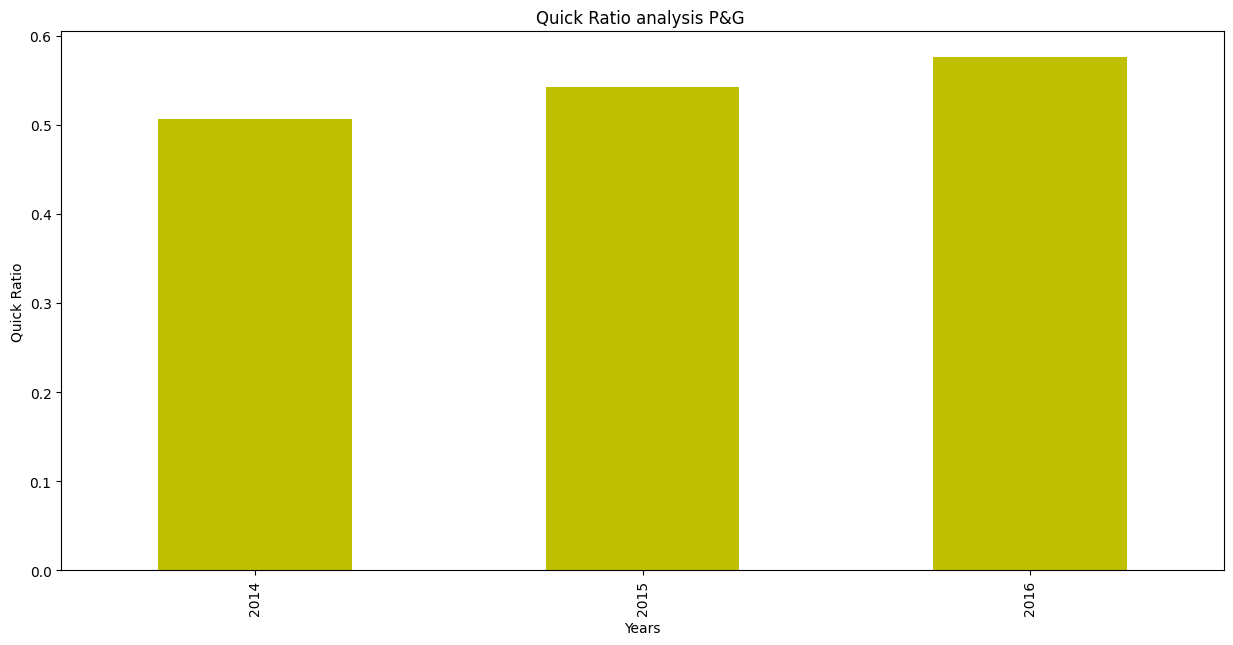

In [25]:
print("Mean of Quick Ratio for P&G last 3 years is {:.2f} ".format(df['quickRatio'].mean()))
plt.figure(figsize=(15, 7))
df['quickRatio'].plot.bar(color='y')
plt.xlabel('Years')
plt.ylabel('Quick Ratio')
plt.title('Quick Ratio analysis P&G ')
plt.grid(False)
plt.show()

In [26]:
#P&G has 0.57 Quick ratio this mean company has more than double liabilities compare to current assets,
#This mean company can not fulfill short term obligations
#Before we reach any conclusion about short term obligation ,we need to analyze the current ratio also

Mean of Quick Ratio for P&G last 3 year is 1.01 


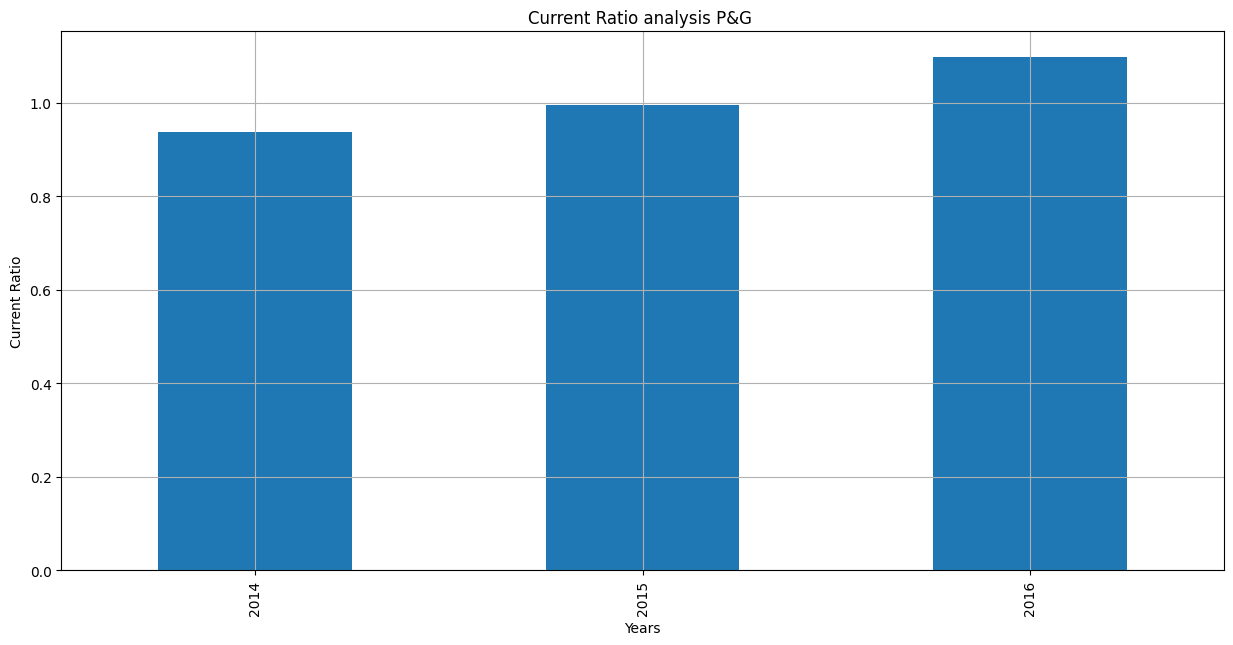

In [27]:
# Current ratio
print("Mean of Quick Ratio for P&G last 3 year is {:.2f} ".format(df['currentRatio'].mean()))
plt.figure(figsize=(15, 7))
df['currentRatio'].plot.bar()
plt.xlabel('Years')
plt.ylabel('Current Ratio')
plt.title('Current Ratio analysis P&G ')
plt.grid(True)
plt.show()

In [32]:
#P&G has good Current ratio (0.95) but still company has more current liabilites compare to current assests
#Let's Analyze debt to equity Ratio : The debt-to-equity (D/E) ratio is calculated by dividing a company’s total liabilities by its shareholder equity it reflects the ability of shareholder equity to cover all outstanding debts in the event of a business downturn.
#Total Asset = Liabilities + Shareholder equity

Mean of Debt to Equity  Ratio for P&G last 3 year is 0.51 


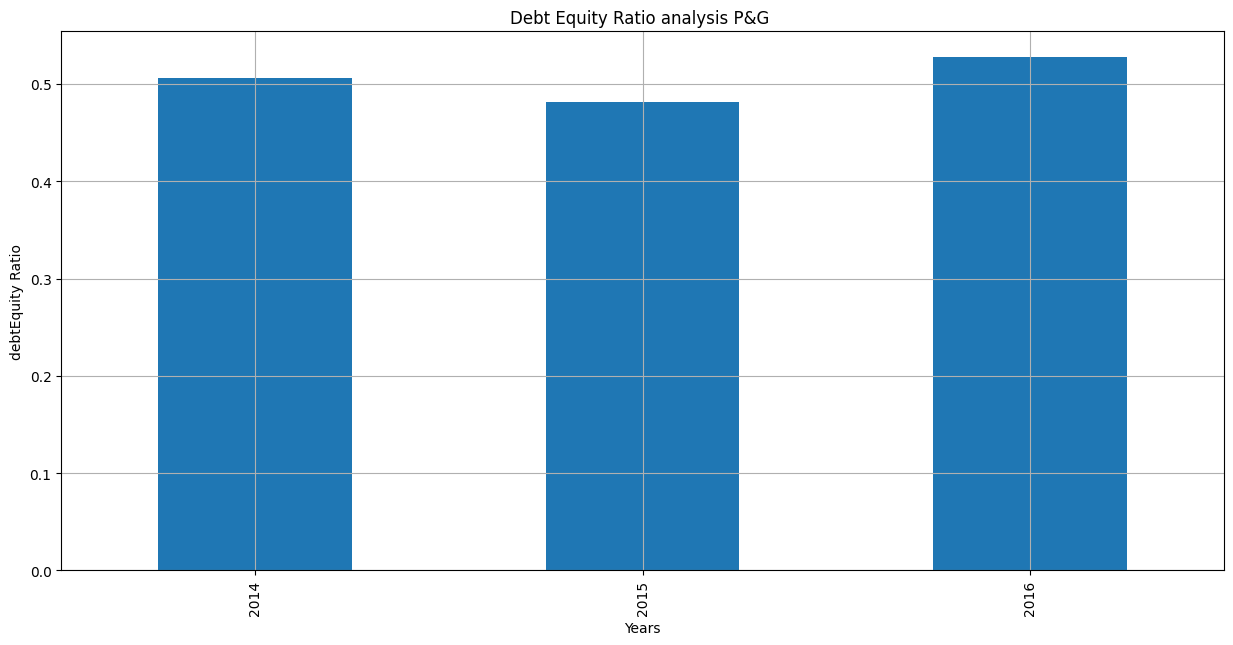

In [33]:
# Debt to Equity ratio
print("Mean of Debt to Equity  Ratio for P&G last 3 year is {:.2f} ".format(df['debtEquityRatio'].mean()))
plt.figure(figsize=(15, 7))
df['debtEquityRatio'].plot.bar()
plt.xlabel('Years')
plt.ylabel('debtEquity Ratio')
plt.title('Debt Equity Ratio analysis P&G ')
plt.grid(True)
plt.show()

In [34]:
#For investors it is good sign : Many investors look for a company to have a debt ratio between 0.3 and 0.6
#Let's analyze Inventory Trunover : the Inventory turnover is a measure of the number of times inventory is sold or used in a time period such as a year. It is calculated to see if a business has an excessive inventory in comparison to its sales level
#Inventory Turnover = Sales/Average Inventory
#Average Inventory = (Start Inventory - ending Inventory)/2

In [ ]:
#Balance Sheet Analysis¶


In [35]:
df['ShortTermAssest'] = df['Cash and cash equivalents'] + df['Cash and short-term investments']+df['Inventories']+df['Average Receivables']\
                        + df['Investments']+df['Investment purchases and sales']+df['Short-term investments']

df['liquidcash'] = df['Cash and cash equivalents'] + df['Cash and short-term investments']

Mean of short Term assest for P&G last 5 year is 37494500000.00 


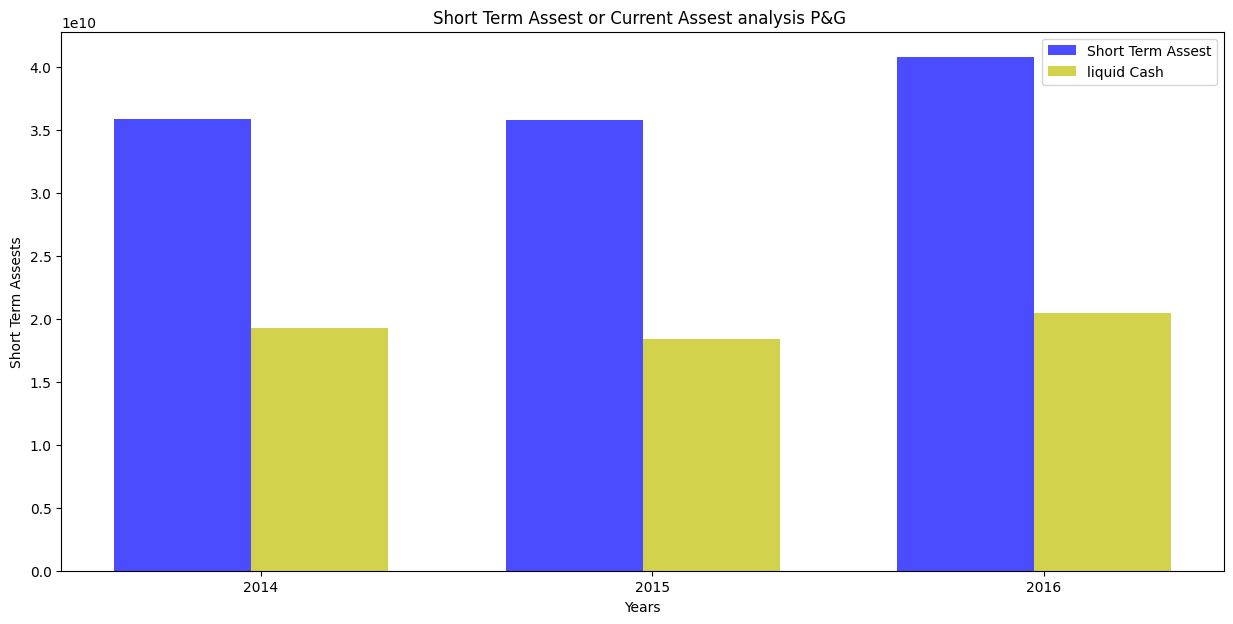

In [37]:
# Short Term Assets
n_year = 3
index = np.arange(n_year)
bar_width = 0.35
opacity = 0.7

print("Mean of short Term assest for P&G last 5 year is {:.2f} ".format(df['ShortTermAssest'].mean()))

plt.figure(figsize=(15, 7))
plt.bar(index,df['ShortTermAssest'],bar_width,alpha=opacity,color='b',label='Short Term Assest')
plt.bar(index+bar_width,df['liquidcash'],bar_width,alpha=opacity,color='y',label='liquid Cash')
plt.xlabel('Years')
plt.ylabel('Short Term Assests')
plt.title('Short Term Assest or Current Assest analysis P&G ')
plt.xticks(index+0.20, df.index)
plt.grid(False)
plt.legend()
plt.show()

Mean of Long Term assest for P&G last 5 year is 94800000000.00 
Mean Percentage Long Term asset out of Total Asset for P&G last 5 year is 70.94% 


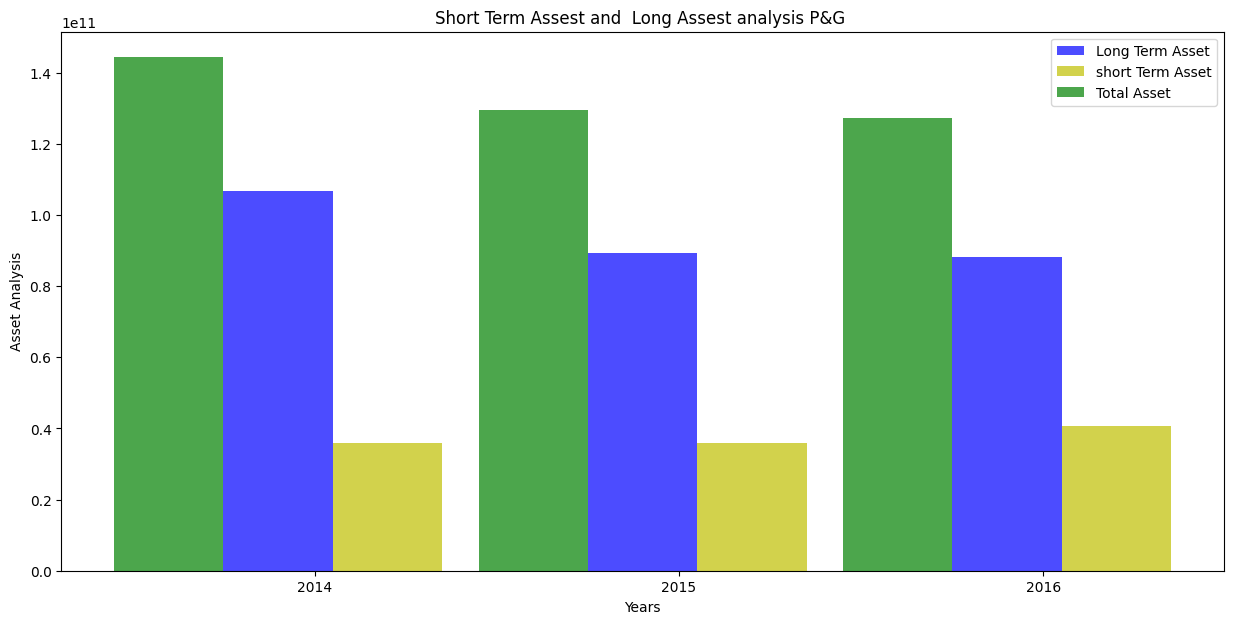

In [38]:
# Long Term Asset and Short-Term Asset
df['LongTermAsset'] = df['Property, Plant & Equipment Net'] +df['Goodwill and Intangible Assets']+df['Long-term investments']
# Long term Asset
n_year = 3
index = np.arange(n_year)
bar_width = 0.3
opacity = 0.7

print("Mean of Long Term assest for P&G last 5 year is {:.2f} ".format(df['LongTermAsset'].mean()))

print("Mean Percentage Long Term asset out of Total Asset for P&G last 5 year is {:.2f}% ".format((df['LongTermAsset'].mean()/df['Total assets'].mean())*100))


plt.figure(figsize=(15, 7))
plt.bar(index,df['LongTermAsset'],bar_width,alpha=opacity,color='b',label='Long Term Asset')
plt.bar(index+bar_width,df['ShortTermAssest'],bar_width,alpha=opacity,color='y',label='short Term Asset')
plt.bar(index-bar_width,df['Total assets'],bar_width,alpha=opacity,color='g',label='Total Asset')
plt.xlabel('Years')
plt.ylabel('Asset Analysis')
plt.title('Short Term Assest and  Long Assest analysis P&G ')
plt.xticks(index+0.10, df.index)
plt.grid(False)
plt.legend()
plt.show();